<!-- AIM OF THE EXPERIMENT:
*   to perform gray level slicing with and without background
*   learning about negative image and thresholding to selectively enhance the image( if pixel coordinate is below threshold make the value 0)
*   if you want to enhance selectively but also want to preserve background use highlighting -->



#Loading the MNIST dataset

In [1]:
import tensorflow as tf
import random
import matplotlib.pyplot as plt

In [2]:
(train_images,train_labels),(_,_ ) = tf.keras.datasets.fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [3]:
train_images = train_images.reshape((60000,28,28,1))

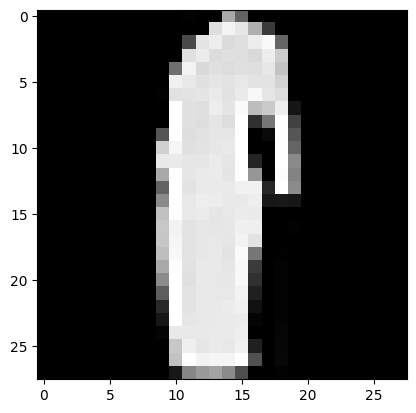

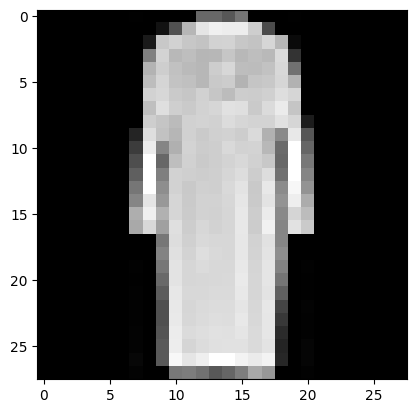

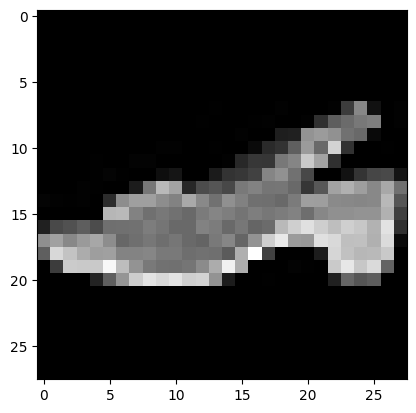

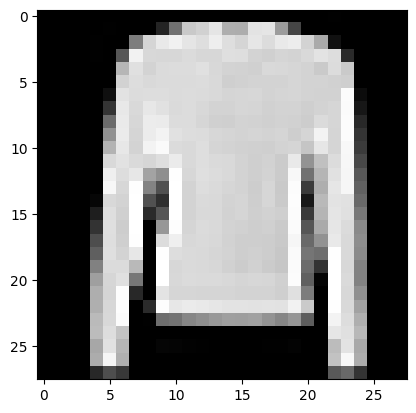

In [4]:
for i in range(4):
  random_index = random.randint(0,len(train_images))
  plt.imshow(train_images[random_index].reshape(28,28),cmap="gray")
  plt.show()

#Negative conversion of the image

In [5]:
def negative_image(img):
  negative=[]
  for i in range(len(img)):
    temporary=[]
    for j in range(len(img[i])):
      temporary.append(256-1-img[i][j])
    negative.append(temporary)
  return negative

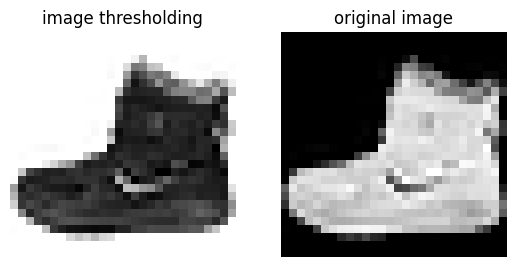

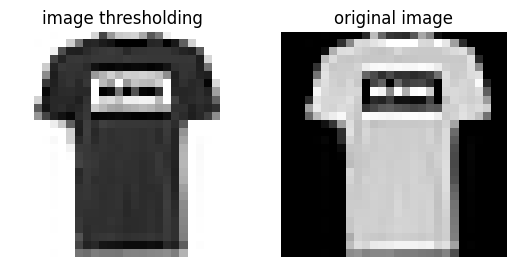

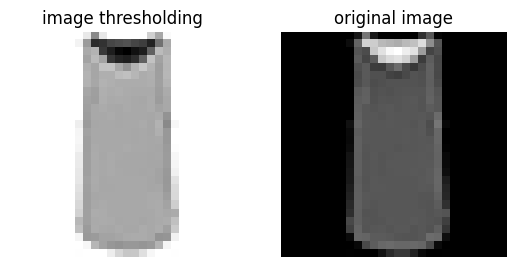

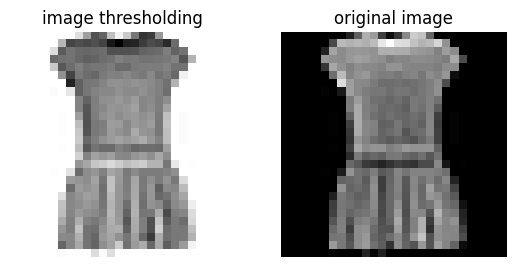

In [6]:
for index in range(4):
  plt.subplot(1,2,1)
  neg_img=negative_image(train_images[index])
  plt.imshow(neg_img,cmap='gray')
  plt.title('image thresholding')
  plt.axis('off')
  plt.subplot(1,2,2)
  plt.imshow(train_images[index],cmap='gray')
  plt.title('original image')
  plt.axis('off')
  plt.show()

#Image Thresholding

In [7]:
def thresholding(img, threshold=121):
  new_img = img.copy()
  for i in range(img.shape[0]):
    for j in range(img.shape[1]):
      if img[i][j] >= threshold:
        new_img[i][j]=255
      else:
        new_img[i][j]=0
  return new_img

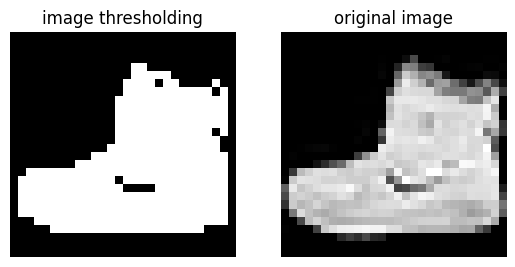

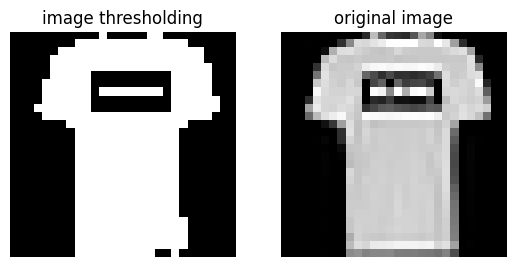

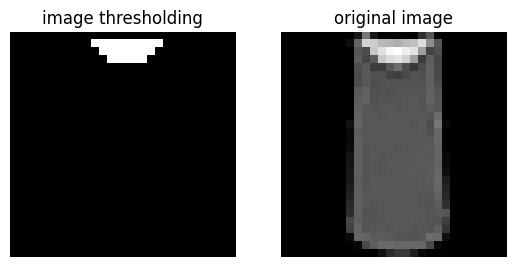

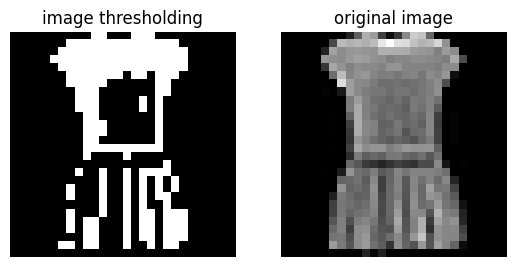

In [8]:
for index in range(4):
  plt.subplot(1,2,1)
  threshold_img=thresholding(train_images[index])
  plt.imshow(threshold_img,cmap='gray')
  plt.title('image thresholding')
  plt.axis('off')
  plt.subplot(1,2,2)
  plt.imshow(train_images[index],cmap='gray')
  plt.title('original image')
  plt.axis('off')
  plt.show()

#Image Thresholding with background

In [9]:
import numpy as np

In [10]:
def thresholding_with_background(img, a, b):
  negative=[]
  for i in range(len(img)):
    temporary=[]
    for j in range(len(img)):
      if img[i][j] >= a and img[i][j] <= b:
        temporary.append(img[i][j])
      else:
        temporary.append(0)
    negative.append(temporary)
  return np.array(negative)

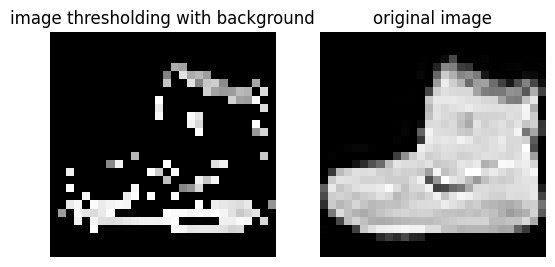

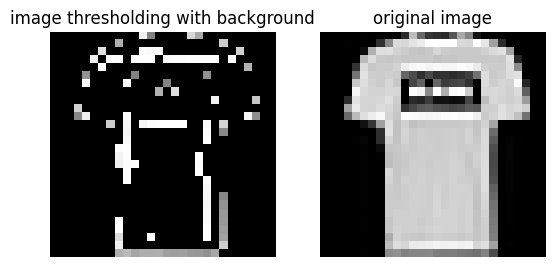

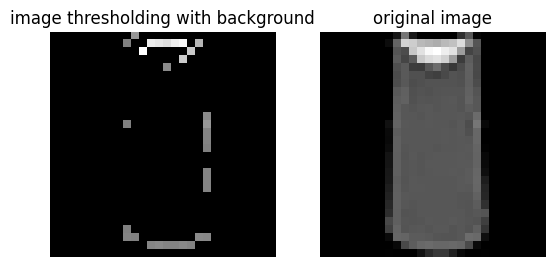

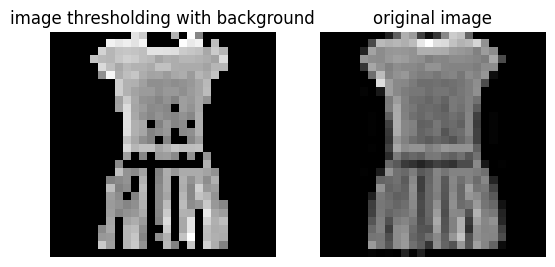

In [11]:
for index in range(4):
  plt.subplot(1,2,1)
  img=thresholding_with_background(train_images[index].reshape(28,28),100,200)
  plt.imshow(img,cmap='gray')
  plt.title('image thresholding with background')
  plt.axis('off')
  plt.subplot(1,2,2)
  plt.imshow(train_images[index],cmap='gray')
  plt.title('original image')
  plt.axis('off')
  plt.show()

#Image Thresholding without background

In [12]:
def thresholding_without_background(img, a, b):
  negative=[]
  for i in range(len(img)):
    temporary=[]
    for j in range(len(img)):
      if img[i][j] >= a and img[i][j] <= b:
        temporary.append(255)
      else:
        temporary.append(0)
    negative.append(temporary)
  return np.array(negative)

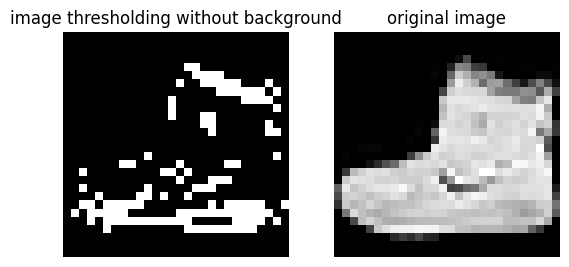

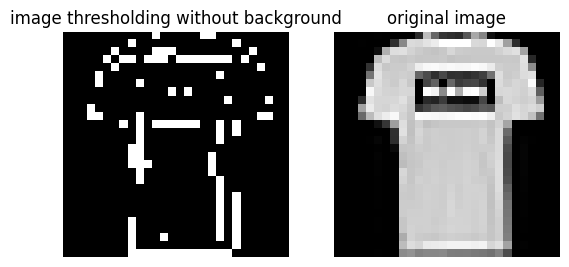

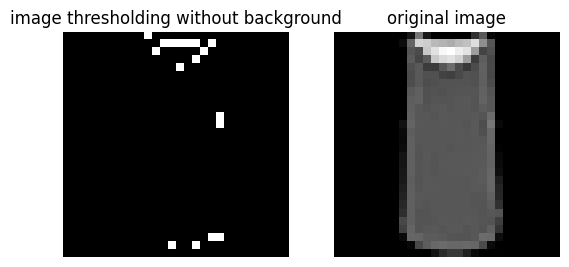

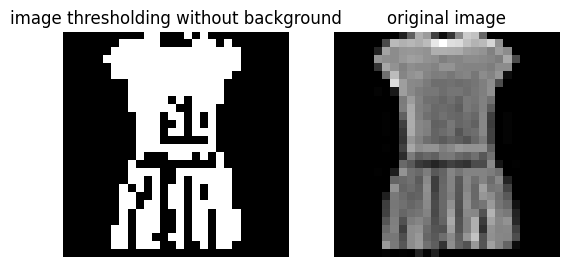

In [13]:
for index in range(4):
  plt.subplot(1,2,1)
  img=thresholding_without_background(train_images[index].reshape(28,28),105,200)
  plt.imshow(img,cmap='gray')
  plt.title('image thresholding without background')
  plt.axis('off')
  plt.subplot(1,2,2)
  plt.imshow(train_images[index],cmap='gray')
  plt.title('original image')
  plt.axis('off')
  plt.show()

#Performing the functions on your own image


In [14]:
import cv2

In [17]:
IMG_PATH = "/content/dog.jpg"
imgd = cv2.imread(IMG_PATH,1)

(-0.5, 274.5, 182.5, -0.5)

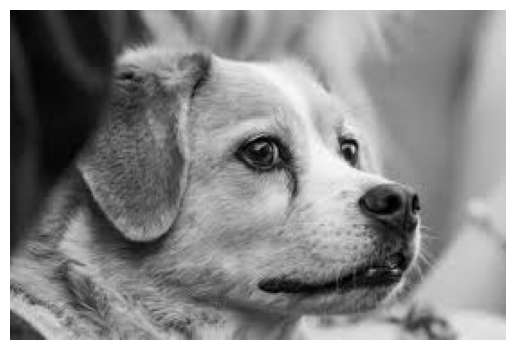

In [18]:
plt.imshow(imgd)
plt.axis('off')

In [26]:
imgd.shape
# image has three channels indicating RGB values and thus not an entirely grayscaled image

(183, 275, 3)

(-0.5, 274.5, 182.5, -0.5)

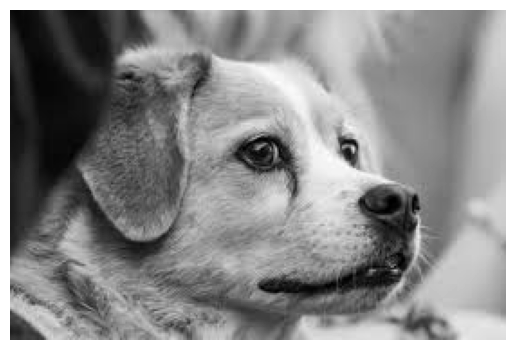

In [29]:
img=cv2.cvtColor(imgd,cv2.COLOR_BGR2GRAY)
plt.imshow(img, cmap="gray")
plt.axis('off')
# grayscaling the image

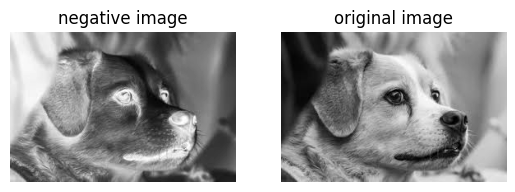

In [21]:
neg_img = negative_image(img)
plt.subplot(1,2,1)
plt.imshow(neg_img,cmap='gray')
plt.title('negative image')
plt.axis('off')
plt.subplot(1,2,2)
plt.imshow(img,cmap='gray')
plt.title('original image')
plt.axis('off')
plt.show()

In [22]:
img.shape
# two channels indicating only black and white

(183, 275)

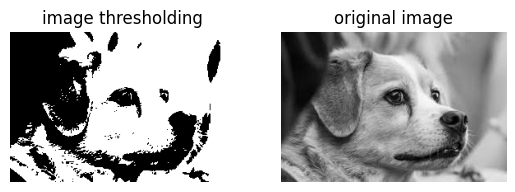

In [23]:
thresholding_img = thresholding(img)
plt.subplot(1,2,1)
plt.imshow(thresholding_img,cmap='gray')
plt.title('image thresholding')
plt.axis('off')
plt.subplot(1,2,2)
plt.imshow(img,cmap='gray')
plt.title('original image')
plt.axis('off')
plt.show()

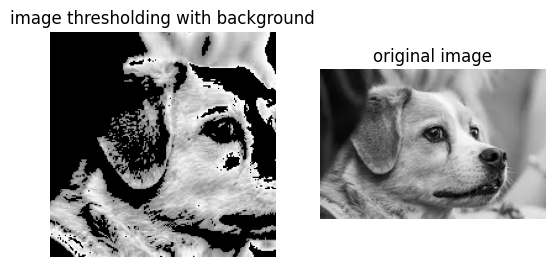

In [24]:
thresholding_with_background_img = thresholding_with_background(img,100,200)
plt.subplot(1,2,1)
plt.imshow(thresholding_with_background_img,cmap='gray')
plt.title('image thresholding with background')
plt.axis('off')
plt.subplot(1,2,2)
plt.imshow(img,cmap='gray')
plt.title('original image')
plt.axis('off')
plt.show()

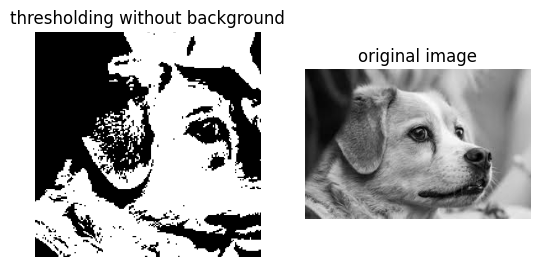

In [25]:
thresholding_without_background_img = thresholding_without_background(img,100,200)
plt.subplot(1,2,1)
plt.imshow(thresholding_without_background_img,cmap='gray')
plt.title('thresholding without background')
plt.axis('off')
plt.subplot(1,2,2)
plt.imshow(img,cmap='gray')
plt.title('original image')
plt.axis('off')
plt.show()

#Applications
**Image Negative Transformation:**

**Medical Imaging:** Used to highlight structures in X-rays, CT scans, or MRI
images by converting dense tissues (which appear light) to dark areas, making abnormalities more visible.

**Thresholding:**

**Document Processing:** Useful in Optical Character Recognition (OCR) systems to extract text from scanned documents.

**Object Detection:** Employed in computer vision systems to segment and identify objects based on their pixel intensity, such as license plate recognition or facial detection.

**Medical Imaging:** Applied in segmenting different parts of the body, such as tumors or bones, by differentiating between tissue types based on their intensity.

**Gray Level Scaling:**

**Medical Diagnostics:** Enhances certain tissue types or abnormalities in medical scans while preserving the overall context of the image, aiding in better diagnosis.

**Satellite Imaging:** Highlights specific terrain features, such as vegetation or water bodies, while maintaining the overall landscape, useful in environmental monitoring and mapping.

**Industrial Inspection:** Used to highlight defects in materials or products by focusing on specific gray level ranges while preserving the background information.


#Conclusions
**Image Negative Transformation:**

Inverts pixel values, turning dark areas light and vice versa, enhancing details not visible in the original image. It’s especially useful in medical imaging and astronomy for highlighting subtle variations, and in images with lighter objects on dark backgrounds.

**Thresholding:**

Segments an image by converting pixels above a set intensity to white and below to black, creating a binary image. This is useful for isolating objects, reducing noise, and focusing on key features in medical scans or text recognition.

**Gray Level Scaling:**

Enhances specific gray level ranges while preserving others, highlighting important features without altering the background. This is crucial in applications like satellite imaging, where both features and context need to be maintained.